# Акрон

**Химическая промышленность / [Акрон](https://www.acron.ru) (AKRN)**

> Группа «Акрон» входит в число крупнейших мировых производителей минеральных удобрений (*оф. сайт Акрон*)

## Менеджмент

...

In [1]:
company = 'AKRN'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dt = pd.read_excel('../tables/akrn.xlsx', index_col='Год').T
dt = dt.sort_index()
n_years = len(dt.index)

In [4]:
dt.head()

Год,Выручка,Себестоимость,Валовая прибыль,Операционная прибыль,Прибыль до налогообложения,Налог на прибыль,Чистая прибыль,Внеоборотные активы,Оборотные активы,Активы,...,Чистый долг,EV,EBITDA,EV/EBITDA,EV/S,P/E,P/S,Debt/EBITDA,ROA,Дивиденды на акцию
2012,7.111200e+10,4.044000e+10,3.067200e+10,1.842000e+10,1.895900e+10,4.098000e+09,1.486100e+10,8.259900e+10,7.402000e+10,1.566190e+11,...,3.410600e+10,9.055811e+10,2.039000e+10,4.441300,1.273457,3.798675,0.793848,3.019078,0.094886,92.0
2013,6.790400e+10,4.200900e+10,2.589500e+10,1.398000e+10,1.592800e+10,2.909000e+09,1.301900e+10,1.048190e+11,4.128500e+10,1.461040e+11,...,3.740000e+10,8.368983e+10,1.654600e+10,5.058010,1.232473,3.555559,0.681695,3.033180,0.086013,64.0
2014,7.463100e+10,4.268400e+10,3.194700e+10,2.095500e+10,8.473000e+09,1.569000e+09,6.904000e+09,1.351600e+11,6.078000e+10,1.959400e+11,...,5.578800e+10,1.503161e+11,2.482600e+10,6.054787,2.014125,13.691794,1.266607,3.245025,0.040369,152.0
2015,1.060550e+11,5.011900e+10,5.593600e+10,3.724600e+10,2.056000e+10,3.854000e+09,1.670600e+10,1.539620e+11,7.281200e+10,2.267740e+11,...,5.118500e+10,1.943111e+11,4.184000e+10,4.644146,1.832172,8.567344,1.349546,1.950430,0.079042,139.0
2016,8.935900e+10,4.531100e+10,4.404800e+10,2.089800e+10,3.311000e+10,5.962000e+09,2.714800e+10,1.380670e+11,5.622000e+10,1.942870e+11,...,5.194900e+10,1.900155e+11,2.699300e+10,7.039435,2.126428,5.085695,1.545076,2.931019,0.128950,335.0


## Динамика выручки, капитала, обязательств, активов

In [5]:
dt.columns

Index(['Выручка', 'Себестоимость', 'Валовая прибыль', 'Операционная прибыль',
       'Прибыль до налогообложения', 'Налог на прибыль', 'Чистая прибыль',
       'Внеоборотные активы', 'Оборотные активы', 'Активы', 'Капитал',
       'Долгосрочные обязательства', 'Краткосрочные обязательства',
       'Обязательства', 'Пассивы', 'Налог на прибыль, %', 'Амортизация',
       'Capex', 'Оборотный капитал', 'Изменение в оборотном капитале', 'FCF',
       'Количество акций', 'Цена акции', 'Капитализация',
       'Долгосрочные кредиты', 'Краткосрочные кредиты', 'Долг', 'Cash',
       'Чистый долг', 'EV', 'EBITDA', 'EV/EBITDA', 'EV/S', 'P/E', 'P/S',
       'Debt/EBITDA', 'ROA', 'Дивиденды на акцию'],
      dtype='object', name='Год')

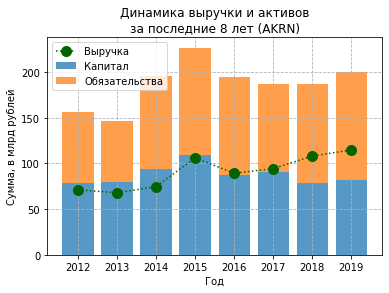

In [9]:
plt.plot(dt.index, dt['Выручка']*1e-9, marker='o', ms=10, label='Выручка', c='darkgreen', ls=':')
plt.bar(dt.index, dt['Капитал']*1e-9, label='Капитал', alpha=0.75)
plt.bar(dt.index, dt['Обязательства']*1e-9, bottom=dt['Капитал']*1e-9, label='Обязательства', alpha=0.75)
plt.xticks(dt.index, dt.index)
plt.legend()
plt.title(f'Динамика выручки и активов\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/assets.png', dpi=200)

Выручка в целом растёт, но несильно. 
Активы существенно не растут, бизнес уже активно не растёт.
Смущает низкое отношение выручки к активам компании.

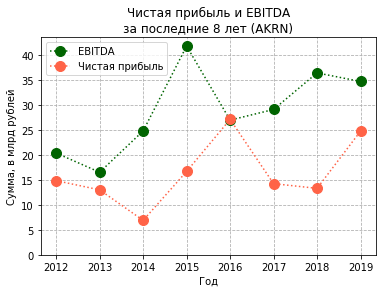

In [7]:
name = "Чистая прибыль и EBITDA"
plt.plot(dt.index, dt['EBITDA']*1e-9, marker='o', ms=10, label='EBITDA', c='darkgreen', ls=':')
plt.plot(dt.index, dt['Чистая прибыль']*1e-9, marker='o', ms=10, label='Чистая прибыль', c='tomato', ls=':')
# plt.bar(dt.index, dt['Чистая прибыль']*1e-9, label='Чистая прибыль', alpha=0.75)
plt.xticks(dt.index, dt.index)
plt.legend()
plt.ylim(0, None)
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/net_profit.png', dpi=200)

Прибыль есть, это хорошо

Теперь посмотрю на динамику свободного денежного потока (FCF) - более продвинутого показателя, который и сложнее подделать

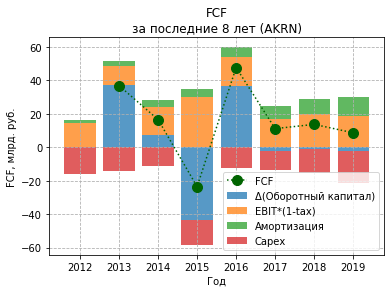

In [8]:
name = "FCF"
plt.plot(dt.index, dt['FCF']*1e-9, marker='o', ms=10, label=name, c='darkgreen', ls=':')
ebit = dt['Операционная прибыль']*1e-9*(1-dt['Налог на прибыль, %'])
dcap = dt['Изменение в оборотном капитале']*1e-9
plt.bar(dt.index, -dcap, label='Δ(Оборотный капитал)', alpha=0.75)
plt.bar(dt.index, ebit, bottom=np.where(-dcap>0, -dcap, 0), label='EBIT*(1-tax)', alpha=0.75)
plt.bar(dt.index, dt['Амортизация']*1e-9, bottom=ebit+np.where(-dcap>0, -dcap, 0), label='Амортизация', alpha=0.75)
plt.bar(dt.index, -dt['Capex']*1e-9, bottom=np.where(dcap>0, -dcap, 0), label='Capex', alpha=0.75)
plt.xticks(dt.index, dt.index)
plt.legend()
# plt.ylim(0, 200)
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel(f'{name}, млрд. руб.')
plt.grid(ls='--')
plt.savefig('../images/fcf.png', dpi=200)

Денежный поток генерируется довольно стабильно, особенно в последние три года

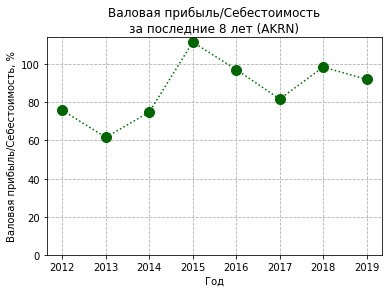

In [10]:
name = "Валовая прибыль/Себестоимость"
plt.plot(dt.index, 100*(dt['Валовая прибыль'])/dt['Себестоимость'], marker='o', ms=10, label=name, c='darkgreen', ls=':')
plt.xticks(dt.index, dt.index)
# plt.legend()
plt.ylim(0, None)
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel(f'{name}, %')
plt.grid(ls='--')
plt.savefig('../images/revenue_cost_price.png', dpi=200)

Высокий показатель Выручки к Себестоимости (что-то вроде добавленной стоимости). 
Высокие значения, приятно

...


## Коэффициент текущей ликвидности

показывает, как компания может погашать текущие обязательства за счет только оборотных активов.
Чем выше коэффициент, тем выше платежеспособность предприятия. Если этот показатель ниже 1,5, значит, предприятие не в состоянии вовремя оплачивать все счета.

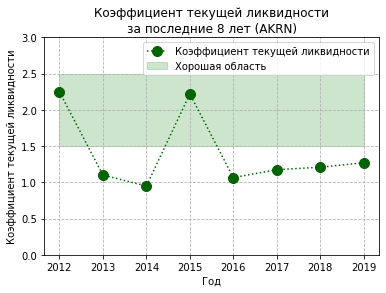

In [11]:
name = "Коэффициент текущей ликвидности"
plt.plot(dt.index, dt['Оборотные активы']/dt['Краткосрочные обязательства'], marker='o', ms=10, label=name, c='darkgreen', ls=':')
plt.fill_between([dt.index.min(),dt.index.max()], [1.5, 1.5], [2.5, 2.5], color='green', alpha=0.2, label='Хорошая область')
plt.xticks(dt.index, dt.index)
plt.legend()
plt.ylim(0, 3)
plt.title(f'{name}\nза последние {len(dt.index)} лет ({company})')
plt.xlabel('Год')
plt.ylabel(f'{name}')
plt.grid(ls='--')
plt.savefig('../images/liquid.png', dpi=200)

Низковаты показатели

Теперь посмотрю детальнее на выручку

In [25]:
sales_structure = \
pd.Series([28547, 22707, 17179, 17365, 12363, 7133, 6271, 3230], 
          index=['Латинская Америка', 'ЕС', 'Россия', 'США и Канада',
                 'Азия (без КНР)', 'КНР', 'Прочее', 'СНГ'])

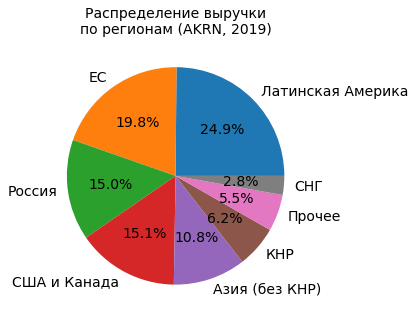

In [36]:
sales_structure.plot(kind='pie', subplots=True, figsize=(7, 5), autopct='%.1f%%', fontsize=14)
plt.title(f"Распределение выручки\nпо регионам ({company}, 2019)", fontsize=14)
plt.ylabel("");
plt.savefig('../images/revenue_export.png', dpi=200)

In [3]:
# sales_structure2 = \
# pd.Series([29.997, 20.611, 6.833], 
#           index=['Капролактам и\nпродукты переработки','Аммиак и азотные\nудобрения', 'Прочее'])

In [4]:
# sales_structure2.plot(kind='pie', subplots=False, figsize=(7, 5), autopct='%.2f', fontsize=14)
# plt.title(f"Распределение выручки по типу\nпродукции ({company}, 2019), в процентах", fontsize=14)
# plt.ylabel("");
# # plt.savefig('../images/revenue_kind.png', dpi=200)

...

## Конкуренты

## Риски
...

## Дивидендная политика

[Дивиденды](https://www.dohod.ru/ik/analytics/dividend/belu)

In [18]:
# name = "Доля чистой прибыли, направленной\nна дивиденды"
# dt['dividend'] = dt['dividend_per_share']*dt['n_shares']
# plt.plot( dt.index, 100*dt['dividend']/dt['net_profit'], marker='o', ms=10, label='Дивиденды/акция' )
# plt.xticks(dt.index, dt.index.astype('str'))
# # plt.legend()
# plt.title(f'{name} за последние {n_years} лет ({company})')
# plt.ylim(0, None)
# plt.xlabel('Год')
# plt.ylabel('Доля, в процентах')
# plt.grid(ls='--')
# plt.savefig('../images/dividend_net_profit.png', dpi=200)

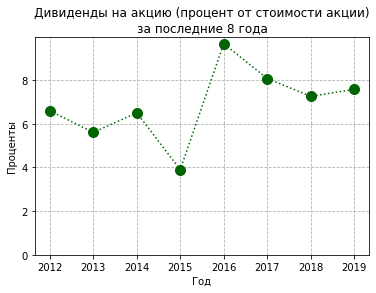

In [12]:
name = "Дивиденды на акцию (процент от стоимости акции)"
data = 100*dt['Дивиденды на акцию']/dt['Цена акции']
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot( dt.index, data, marker='o', ms=10, ls=':', c='darkgreen' )
# plt.legend()
plt.title(f'{name}\nза последние {len(data.dropna())} года')#{n_years} лет ({company})')
plt.ylim(0, None)
plt.xlabel('Год')
plt.ylabel('Проценты')
plt.grid(ls='--')
plt.savefig('../images/dividend_share_percent.png', dpi=200)

Большие дивиденды, на уровне 7-8% в последние годы, приятно

## ROA

Отвечает на вопрос, выгоднее ли "владельцу" всё продать и положить деньги на депозит?

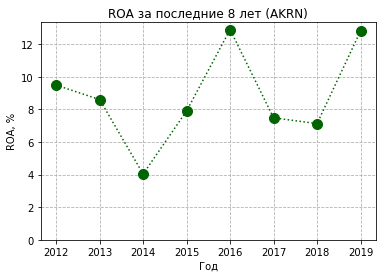

In [14]:
name = "ROA"
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot( dt.index, 100*dt['ROA'], marker='o', ms=10, label=name, c='darkgreen', ls=':')
# plt.legend()
plt.ylim(0, None)
plt.title(f'{name} за последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('ROA, %')
plt.grid(ls='--')
plt.savefig('../images/ROA.png', dpi=200)

Высокий показатель ROA, за последние 5 лет не опускался ниже 6%, хорошо

## Оценка компании

Теперь, пользуясь мультипликаторами, можно попробовать проверить, недооценена или переоценена компания на бирже

### Капитализация

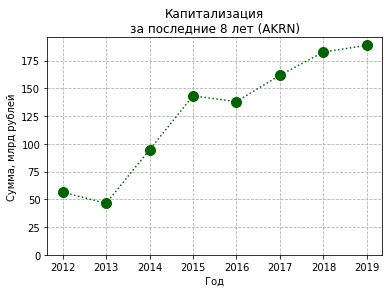

In [17]:
name = "Капитализация"
data = dt['Капитализация']*1e-9
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot( dt.index, data, marker='o', ms=10, label='Капитализация', c='darkgreen', ls=':')
# plt.legend()
plt.ylim(0, None)
plt.title(f'{name}\nза последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/capitalization.png', dpi=200)

 Капитализация стабильно растёт, инвесторы видят в компании что-то притягивающее

### P/E
Через сколько лет окупится инвестиция, если прибыль останется на том же уровне и всю прибыль руководство направит на дивиденды

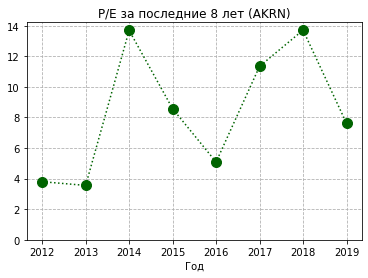

In [19]:
name = "P/E"
data = dt['P/E']
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot( dt.index, data, marker='o', ms=10, label=name, ls=':', c='darkgreen' )
# plt.legend()
plt.title(f'{name} за последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
plt.savefig('../images/PE.png', dpi=200)

...

### P/S
Отношение рыночной капитализации компании к её годовой выручке. 
Показатель <1 может говорить о недооценённости компании

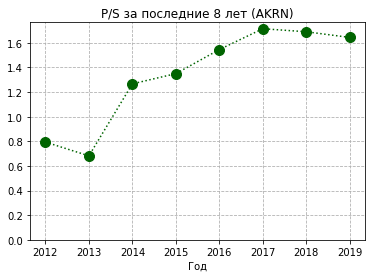

In [21]:
name = "P/S"
data = dt['P/S']
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot( dt.index, data, marker='o', ms=10, label=name, ls=':', c='darkgreen' )
# plt.legend()
plt.title(f'{name} за последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
plt.savefig('../images/PS.png', dpi=200)

...

### EV/EBITDA

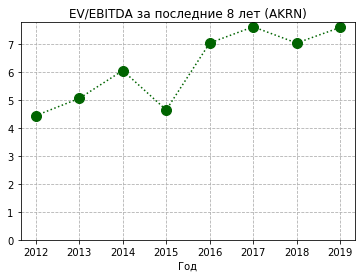

In [22]:
name = 'EV/EBITDA'
data = dt['EV/EBITDA']
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot(dt.index, data, marker='o', ms=10, label=name, ls=':', c='darkgreen')
# plt.legend()
plt.title(f'{name} за последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
# plt.ylabel('') 
plt.ylim(0, None)
plt.grid(ls='--')
plt.savefig('../images/EV_EBITDA.png', dpi=200)

...

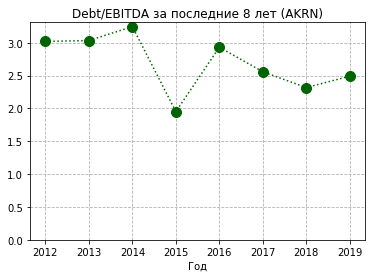

In [24]:
name = 'Debt/EBITDA'
data = dt['Debt/EBITDA']
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot(dt.index, data, marker='o', ms=10, label=name, ls=':', c='darkgreen')
# plt.legend()
plt.title(f'{name} за последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
plt.savefig('../images/Debt_EBITDA.png', dpi=200)

## [Планы](https://www.himprom.com/presscentr/news/11636/) на будущее

...

## Вывод

...